<a href="https://colab.research.google.com/github/hemanthmeruga/IEApp/blob/master/CNN_Project1_HM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Acquire the Data

These images very downloaded google.com/images with "reuse with modification" filter to allow for commercial reuse.

In [0]:
#!mkdir data
#!wget https://bit.do/dosa-nodosa -O data/food-binary.zip
#!cd data && unzip food-binary.zip

### Load basic libraries

In [0]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import vis

Using TensorFlow backend.


## Refine the Data 

This is the pre-processing step to see the images.
- Normalize the images
- Standardize to singular size

** Let us see one image from the dataset **

In [0]:
from keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator

In [0]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import os
os.chdir('/gdrive/My Drive')

In [0]:
pwd

'/gdrive/My Drive'

In [0]:
img = load_img("R8_Project1_Data/train/Black-grass/0183fdf68.png")

In [0]:
# Read as matrix and see shape
image = img_to_array(img)
image.shape

(388, 388, 3)

### Normalize the image by rescaling to 0 - 1

In [0]:
image = image / 255

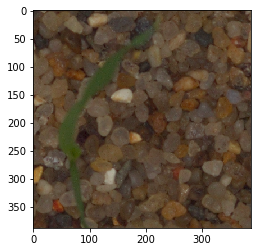

In [0]:
# View the image
plt.imshow(image);

### Standardize to one size

In [0]:
import PIL

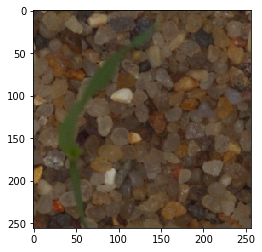

In [0]:
img = img.resize((256,256), PIL.Image.LANCZOS)
plt.imshow(img);

#### See images from the first batch

In [0]:
gen = ImageDataGenerator(rescale=1/255)

In [0]:
view = gen.flow_from_directory(directory="R8_Project1_Data/train", target_size=(256,256), 
                               class_mode="categorical", batch_size=10)

Found 4790 images belonging to 12 classes.


In [0]:
images = view.next()

In [0]:
import importlib
importlib.reload(vis)

<module 'vis' from '/usr/local/lib/python3.6/dist-packages/vis/__init__.py'>

## Model: Multi-Layer Perceptron

**Step 1: Prepare the images and labels**

Split data into train & validation and normalise the data to (0,1) 

In [0]:
data = ImageDataGenerator(validation_split=0.2, rescale=1/255)

In [0]:
train_generator = data.flow_from_directory(directory="R8_Project1_Data/train", 
                                           target_size=(256,256),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='training')

Found 3835 images belonging to 12 classes.


In [0]:
val_generator = data.flow_from_directory(directory="R8_Project1_Data/train", 
                                           target_size=(256,256),
                                           class_mode="categorical", 
                                           shuffle=True, 
                                           batch_size=8, 
                                           subset='validation')

Found 955 images belonging to 12 classes.


**Step 2: Craft the feature transfomation and classifier model **

In [0]:
from keras import Sequential
from keras.layers import Dense, Activation, Flatten

In [0]:
mlp = Sequential()
mlp.add(Dense(units=10, activation='relu', input_shape=(256, 256, 3)))
mlp.add(Flatten())
mlp.add(Dense(units=12, activation='sigmoid'))

W0616 15:33:54.431465 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 15:33:54.474205 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 15:33:54.480959 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256, 256, 10)      40        
_________________________________________________________________
flatten_1 (Flatten)          (None, 655360)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                7864332   
Total params: 7,864,372
Trainable params: 7,864,372
Non-trainable params: 0
_________________________________________________________________


**Step 3: Compile and fit the model**

In [0]:
mlp.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

W0616 15:34:13.459913 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 15:34:13.482759 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0616 15:34:13.490235 140097725568896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
mlp_output =  mlp.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=5,
    validation_data=val_generator,
    verbose = 2,
    validation_steps=20
)

W0616 15:34:21.211786 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
 - 53s - loss: 0.4137 - acc: 0.8797 - val_loss: 0.3757 - val_acc: 0.8568
Epoch 2/5
 - 36s - loss: 0.3130 - acc: 0.9052 - val_loss: 0.3382 - val_acc: 0.9109
Epoch 3/5
 - 33s - loss: 0.3157 - acc: 0.9151 - val_loss: 0.2919 - val_acc: 0.9167
Epoch 4/5
 - 35s - loss: 0.2984 - acc: 0.9167 - val_loss: 0.3085 - val_acc: 0.9167
Epoch 5/5
 - 32s - loss: 0.2975 - acc: 0.9141 - val_loss: 0.2829 - val_acc: 0.9167


**Step 4: Check the performance of the model**

In [0]:
mlp_metrics = mlp_output.history

## Model: Convolution Neural Network

In [0]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

In [0]:
cnn = Sequential()
cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Conv2D(64, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(3, 3)))
cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(12, activation='sigmoid'))

W0616 15:37:56.343703 140097725568896 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0616 15:37:56.395353 140097725568896 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 84, 84, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 82, 82, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 27, 27, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)              0         
__________

In [0]:
cnn.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [0]:
cnn_output =  cnn.fit_generator(train_generator, steps_per_epoch=20, epochs=5, validation_data=val_generator, verbose = 2, validation_steps=20)

Epoch 1/5
 - 44s - loss: 0.6855 - acc: 0.5948 - val_loss: 0.6688 - val_acc: 0.8194
Epoch 2/5
 - 21s - loss: 0.6526 - acc: 0.7797 - val_loss: 0.6286 - val_acc: 0.8385
Epoch 3/5
 - 33s - loss: 0.5973 - acc: 0.8104 - val_loss: 0.5509 - val_acc: 0.8385
Epoch 4/5
 - 33s - loss: 0.5262 - acc: 0.8115 - val_loss: 0.4603 - val_acc: 0.8406
Epoch 5/5
 - 34s - loss: 0.4356 - acc: 0.8500 - val_loss: 0.3811 - val_acc: 0.8417


In [0]:
cnn_metrics = cnn_output.history

In [0]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
            images.append(filename)
    return images
  
  
test_files = load_images_from_folder('R8_Project1_Data/test')

print(test_files[0:2])

['1b490196c.png', '506347cfe.png']


In [0]:
img1 = load_img('R8_Project1_Data/test/026716f9b.png')

#R8_Project1_Data/train/Charlock/022179d65.png
#gdrive/My Drive/R8_Project1_Data/test/026716f9b.png

In [0]:
# Read as matrix and see shape
image = img_to_array(img1)
image.shape

(231, 231, 3)

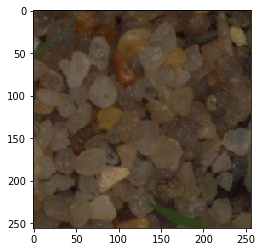

In [0]:
img2 = img1.resize((256,256), PIL.Image.LANCZOS)
plt.imshow(img2);

In [0]:
img2.size

(256, 256)

In [0]:
test_image = np.expand_dims(img2, axis=0)

img_width, img_height = 256, 256
test_image = test_image.reshape(1, img_width, img_height, 3)
#test_image = test_image.reshape(img_width, img_height*3)


test_image.shape

(1, 256, 256, 3)

In [0]:
#Model prediction
prediction = cnn.predict(test_image)

print (prediction.argmax())

#prediction = prediction.data.numpy().argmax()
#print(prediction)

#Print prediction
#print(prediction)




7
